# ImpDAR Quad-Polarized ApRES (QpDAR)
## Polarimetric Processing

Here, we define a separate data object, QuadPolData, for polarimetric ApRES processing with four acquisitions. This should be done after the initial processing for each aquisition, so have a look at the opening tutorial notebook first. If individual acquisitions are not already processed, the load function tries to do that automatically.

The main processing functionality within the QuadPol class includes: 
- `rotational_transform`
- `cpe_selection`
- `coherence2d`
- `cpe_phase_gradient`
- `phase_gradient2d`

We overview each of these below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from impdar.lib.ApresData import load_apres,load_quadpol

%matplotlib inline

## Load QuadPol data class

Data can be loaded as a QuadPolData object either from a file that was previously written by ImpDAR (.mat, .h5) or from four ApRES data files in the order 'HH', 'HV', 'VH', 'VV'.
- `load_quadpol(['quadpol.mat'])`
- `load_quadpol(['quadpol_HH.DAT', 'quadpol_HV.DAT', 'quadpol_VH.DAT', 'quadpol_VV.DAT'])`

If you leave off the extension the function will try to figure it out for you. For instance:
- `load_quadpol(['quadpol'])` will load `['quadpol_HH.DAT', 'quadpol_HV.DAT', 'quadpol_VH.DAT', 'quadpol_VV.DAT']`

The load script then checks that all 4 aquisitions are compatible and tries to do the initial processing before bringing them together.

Restacked acquisition #1 to a 1-d array.
Acquisition # 1 has not been converted to range. Range conversion now...
Restacked acquisition #2 to a 1-d array.
Acquisition # 2 has not been converted to range. Range conversion now...
Restacked acquisition #3 to a 1-d array.
Acquisition # 3 has not been converted to range. Range conversion now...
Restacked acquisition #4 to a 1-d array.
Acquisition # 4 has not been converted to range. Range conversion now...


/Users/benhills/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


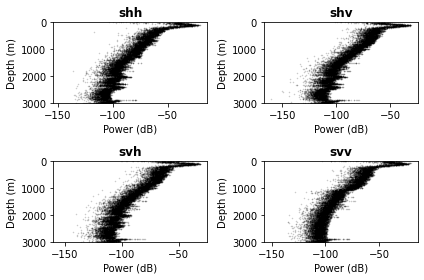

In [2]:
# Load the four acquisitions, one for each acquisitions
qp_dat = load_quadpol.load_quadpol('./data/quadpol')

# ----------------------------------------------------------

# Plot all four acquisitions together
plt.figure()

plt.subplot(221)
plt.plot(10.*np.log10(qp_dat.shh**2.),qp_dat.range,'.',c='k',ms=1,alpha=0.2)
plt.ylim(3000,0)
plt.title('shh',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Power (dB)')

plt.subplot(222)
plt.plot(10.*np.log10(qp_dat.shv**2.),qp_dat.range,'.',c='k',ms=1,alpha=0.2)
plt.ylim(3000,0)
plt.title('shv',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Power (dB)')

plt.subplot(223)
plt.plot(10.*np.log10(qp_dat.svh**2.),qp_dat.range,'.',c='k',ms=1,alpha=0.2)
plt.ylim(3000,0)
plt.title('svh',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Power (dB)')

plt.subplot(224)
plt.plot(10.*np.log10(qp_dat.svv**2.),qp_dat.range,'.',c='k',ms=1,alpha=0.2)
plt.ylim(3000,0)
plt.title('svv',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Power (dB)')

plt.tight_layout()

With the stacked data imported into a single data class we then use a rotational transform to simulate data in an azimuthal rotation.
`qp_dat.rotational_transform()`

This takes the number of azimuths, `n_thetas` as input. The function also checks that the cross-polarized terms are consistent with one another. If they were oriented backwards (as has been reported an issue by several field groups) they will have opposite sign and the rotational transform will produce falsely symmetric data.

/Users/benhills/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:2825: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


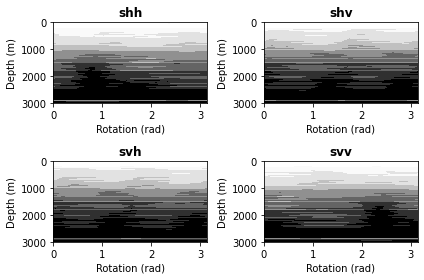

In [3]:
# Rotate the acquisitions around all azimuths
qp_dat.rotational_transform(cross_pol_flip='HV')

Θs,Ds = np.meshgrid(qp_dat.thetas,qp_dat.range)

plt.figure()

plt.subplot(221)
plt.contourf(Θs,Ds,10.*np.log10(qp_dat.HH**2.),cmap='Greys_r',levels=20,vmin=-100,vmax=-50)
plt.ylim(3000,0)
plt.title('shh',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Rotation (rad)')

plt.subplot(222)
plt.contourf(Θs,Ds,10.*np.log10(qp_dat.HV**2.),cmap='Greys_r',levels=20,vmin=-100,vmax=-50)
plt.ylim(3000,0)
plt.title('shv',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Rotation (rad)')

plt.subplot(223)
plt.contourf(Θs,Ds,10.*np.log10(qp_dat.VH**2.),cmap='Greys_r',levels=20,vmin=-100,vmax=-50)
plt.ylim(3000,0)
plt.title('svh',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Rotation (rad)')

plt.subplot(224)
plt.contourf(Θs,Ds,10.*np.log10(qp_dat.VV**2.),cmap='Greys_r',levels=20,vmin=-100,vmax=-50)
plt.ylim(3000,0)
plt.title('svv',fontweight='bold')
plt.ylabel('Depth (m)')
plt.xlabel('Rotation (rad)')

plt.tight_layout()

# Find the Girdle Axis

The maximum girdle axis should theoretically be at the location with minimum returned power for cross-polarized acquisitions (Ershadi et al., 2022). Do some filtering of the cross-polarized image (either one) to get the extinction axis.

# HH-VV Coherence

In [ ]:
# Do the HH-VV coherence calculation
qp_dat.coherence2d()

# Mesh the thetas and ranges in order to reference the filled contour plots
Θs,Ds = np.meshgrid(qp_dat.thetas,qp_dat.range)

plt.figure()
plt.subplot(121)
plt.contourf(Θs,Ds,np.abs(qp_dat.chhvv),cmap='Greys_r',levels=20)
plt.ylim(3000,0)

plt.subplot(122)
plt.contourf(Θs,Ds,np.angle(qp_dat.chhvv),cmap='twilight_r',levels=20)
plt.ylim(3000,0)

In [ ]:
qp_dat.copolarized_phase_gradient()

# Mesh the thetas and ranges in order to reference the filled contour plots
Θs,Ds = np.meshgrid(qp_dat.thetas,qp_dat.range)

# Limit the 
dphi_dz = qp_dat.dphi_dz.copy()
dphi_dz[dphi_dz>.02]=.02
dphi_dz[dphi_dz<-.02]=-.02

plt.figure()
plt.contourf(Θs,Ds,dphi_dz,cmap='seismic',levels=20)
plt.colorbar()
plt.ylim(3000,0)